<h1>Taller 6: Ruta más corta</h1>

Librerias

In [1]:
import random as rnd
import numpy as np
from heapq import heappush, heappop
from collections import deque
from IPython.display import Image
import networkx as nx
import matplotlib.pyplot as plt
import pylab
import time
%matplotlib inline

<h3>Floyd-Warshall</h3>

In [2]:
def FloydWarshall(W):
    n = W.shape[0]
    D_list = []#Save each D^{(k)} matrix
    D_list.append(W[:,:])#D^{(0)}
    
    for k in range(n):        
        D_k = D_list[k][:,:]
        for i in range(n):
            for j in range(n):
                D_k[i,j] = min(D_list[k][i,j], D_list[k][i,k]+D_list[k][k,j])        
        D_list.append(np.copy(D_k))
        
    return D_k, D_list

<h3>Dijkstra</h3>

In [3]:
def updateheap(heap,d,v):
    for i in range(len(heap)):
        if heap[i][1] == v:
            heap[i][0] = d
            fix_minheap(heap,i) # heap=heapify(heap) ineficient      
            break    

def fix_minheap(heap, i):
    if i == 0: return  
    p = int(i/2) #parent  
    if p >= 0 and heap[p][0] > heap[i][0]:
        heap[i], heap[p] = heap[p], heap[i]
        fix_minheap(heap,p)   
            
def Dijkstra(G,start):
    D = {} # dictionary of final distances
    for v in G:
        D[v] = float('inf')
    D[start] = 0
    
    P = {} # dictionary of predecessors
    
    Q=[] #  priority queue est.dist. of non-final vert.
    for v in G:
        item = []
        item.append(D[v])
        item.append(v)
        heappush(Q,item)
    
    #S = []
    while Q:
        u = heappop(Q)[1]
        #S.append(u)
        for v in G[u]:
            newDuv = D[u] + G[u][v]
            if newDuv < D[v]:
                P[v] = u
                D[v] = newDuv
                updateheap(Q,D[v],v)
    return D, P

In [4]:
# From  http://www.ics.uci.edu/~eppstein/161/python/dijkstra.py
# David Eppstein, UC Irvine, 4 April 2002
def shortestPath(G,start,end,method):
    """
    Find a single shortest path from the given start vertex to the given end vertex.
    The input has the same conventions as Dijkstra().
    The output is a list of the vertices in order along the shortest path.
     """
    if method ==  'Dijkstra':
        D,P = Dijkstra(G,start)
    elif method == 'Bellman':
        D,P = BellmanFord(G,start)
    else:
        D,P = Dijkstra(G,start)
    
    Path = []
    while 1:
        Path.append(end)
        if end == start: break
        end = P[end]
    Path.reverse()
    
    return Path

<h3>Bellman-Ford</h3>

In [5]:
def BellmanFord(G,start):
    D = {} # dictionary of final distances
    for v in G:
        D[v] = float('inf')
    D[start] = 0
    
    P = {} # dictionary of predecessors
    
    for i in range(len(G)-1):
        for u in G:
            for v in G[u]:   
                newDv = D[u] + G[u][v]
                if newDv < D[v]:
                    P[v] = u
                    D[v] = newDv
    
    for u in G:
        for v in G[u]:   
            newDv = D[u] + G[u][v]
            if newDv < D[v]: print("Negative cicle",u,v)
                
    return D, P

<h3>Punto 1</h3>

<i>Implemente un método para crear grafos aleatorios de $n$ vertices, donde con probabilidad $\psi \in [0,1]$ definira si exite una arista entre cada par de vertices $(i,j)$. El peso $\omega(i,j) \in [minw, maxw]$ se asignará de manera aleatoria uniformemente en el intervalo $[minw, maxw]$.</i>

Para dibujar el grafo:

In [6]:
def draw_graph(graph):
    G = nx.DiGraph()
    for node in graph:
        G.add_nodes_from([node])
        for conect in graph[node]:
            G.add_edges_from([(node, conect)], weight = graph[node][conect])
    
    values = 'blue'
    edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])
    edge_colors = 'red'
        
    pos=nx.spring_layout(G)
    node_labels = {node:node for node in G.nodes()};
    nx.draw_networkx_labels(G, pos, labels=node_labels)
    nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
    nx.draw(G,pos, node_color = values, node_size=1500,edge_color=edge_colors,edge_cmap=plt.cm.Reds)
    pylab.show()

Contrucción de grafo areatorio.

In [7]:
def randomGraph(n, minw, maxw):
    if n > 26:
        n = 26
    if n < 1:
        n = 1
    for x in range(1, n+1):
        l1 = [chr(n) for n in rnd.sample(range(65, 65+x), x)]
        
    l2 = []
    for y in range(len(l1)):
        l1_c = l1[0:y] + l1[y+1:len(l1)]
        neighbors = rnd.sample(l1_c, rnd.randint(0, len(l1)-1))
        cost = [rnd.randint(minw, maxw) for r in xrange(len(neighbors))]
        l2.append(dict(zip(neighbors, cost)))
            
    graph = dict(zip(l1, l2))

    return l1, graph

Ejemplo:

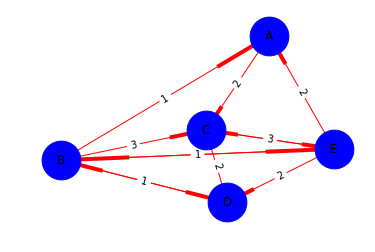

Nodo: A
  Vecinos:
   C -> 2


Nodo: C
  Vecinos:
   E -> 1


Nodo: B
  Vecinos:
   A -> 1
   C -> 3
   E -> 1
   D -> 1


Nodo: E
  Vecinos:
   A -> 2
   C -> 3
   B -> 2
   D -> 2


Nodo: D
  Vecinos:
   C -> 2
   B -> 2




In [26]:
n = 5
minw = 1
maxw = 3

nodes, graph = randomGraph(n, minw, maxw)

draw_graph(graph)
for node in graph:
    print "Nodo:", node
    print "  Vecinos:"
    for conect in graph[node]:
        print "  ", conect, "->", graph[node][conect]
    print "\n"

<h3>Punto 2</h3>

<i>Adapte el algoritmo de Dijkstra para calcular todos los pares de rutas más cortas.</i>

In [27]:
def find_all_dijkstra(graph):
    path = []

    for i in range(0, len(nodes)):
        path.append(Dijkstra(graph, nodes[i]))
    
    return path

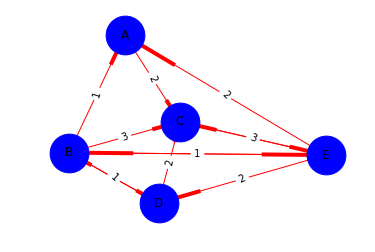

Inicio: D
  Camino más corto:
   {'A': 'B', 'C': 'D', 'B': 'D', 'E': 'C'}
  Con pesos de:
   {'A': 3, 'C': 2, 'B': 2, 'E': 3, 'D': 0} 

Inicio: B
  Camino más corto:
   {'A': 'B', 'C': 'B', 'E': 'B', 'D': 'B'}
  Con pesos de:
   {'A': 1, 'C': 3, 'B': 0, 'E': 1, 'D': 1} 

Inicio: E
  Camino más corto:
   {'A': 'E', 'C': 'E', 'B': 'E', 'D': 'E'}
  Con pesos de:
   {'A': 2, 'C': 3, 'B': 2, 'E': 0, 'D': 2} 

Inicio: A
  Camino más corto:
   {'C': 'A', 'B': 'E', 'E': 'C', 'D': 'E'}
  Con pesos de:
   {'A': 0, 'C': 2, 'B': 5, 'E': 3, 'D': 5} 

Inicio: C
  Camino más corto:
   {'A': 'E', 'B': 'E', 'E': 'C', 'D': 'E'}
  Con pesos de:
   {'A': 3, 'C': 0, 'B': 3, 'E': 1, 'D': 3} 



In [28]:
path = find_all_dijkstra(graph)

draw_graph(graph)
    
for i in range (0, len(nodes)):
    print "Inicio:", nodes[i]
    print "  Camino más corto:"
    print "  ", path[i][1]
    print "  Con pesos de:"
    print "  ", path[i][0], "\n"

<h3>Punto 3</h3>

<i>Adapte el algoritmo de Bellman-Ford para calcular todos los pares de rutas más cortas.</i>

In [29]:
def find_all_bellman(graph):
    path = []

    for i in range(0, len(nodes)):
        path.append(BellmanFord(graph, nodes[i]))
        
    return path

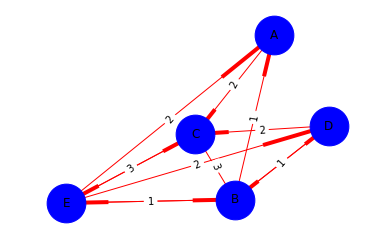

Inicio: D
  Camino más corto:
   {'A': 'B', 'C': 'D', 'B': 'D', 'E': 'C'}
  Con pesos de:
   {'A': 3, 'C': 2, 'B': 2, 'E': 3, 'D': 0} 

Inicio: B
  Camino más corto:
   {'A': 'B', 'C': 'B', 'E': 'B', 'D': 'B'}
  Con pesos de:
   {'A': 1, 'C': 3, 'B': 0, 'E': 1, 'D': 1} 

Inicio: E
  Camino más corto:
   {'A': 'E', 'C': 'E', 'B': 'E', 'D': 'E'}
  Con pesos de:
   {'A': 2, 'C': 3, 'B': 2, 'E': 0, 'D': 2} 

Inicio: A
  Camino más corto:
   {'C': 'A', 'B': 'E', 'E': 'C', 'D': 'E'}
  Con pesos de:
   {'A': 0, 'C': 2, 'B': 5, 'E': 3, 'D': 5} 

Inicio: C
  Camino más corto:
   {'A': 'E', 'B': 'E', 'E': 'C', 'D': 'E'}
  Con pesos de:
   {'A': 3, 'C': 0, 'B': 3, 'E': 1, 'D': 3} 



In [30]:
path = find_all_bellman(graph)
    
draw_graph(graph)

for i in range (0, len(nodes)):
    print "Inicio:", nodes[i]
    print "  Camino más corto:"
    print "  ", path[i][1]
    print "  Con pesos de:"
    print "  ", path[i][0], "\n"

<h3>Punto 4</h3>

<i>Implemente el algoritmo de BFS para calcular todos los pares de rutas más cortas (asumiendo que la longitud de la ruta esta dada por la cantidad de aristas que interviene más no por su peso).</i>

In [31]:
def shortest_path(graph, start, end):
    parents = {}
    for parent, child in bfs(graph, start):
        parents[child] = parent
        if child == end:
            revpath = [end]
            while True:
                parent = parents[child]
                revpath.append(parent)
                if parent == start:
                    break
                child = parent
            return list(reversed(revpath))
    return None

def bfs(graph, start):
    queue, enqueued = deque([(None, start)]), set([start])
    while queue:
        parent, n = queue.popleft()
        yield parent, n
        new = set(graph[n]) - enqueued
        enqueued |= new
        queue.extend([(n, child) for child in new])

Ejemplo:

Camino más corto desde Y a U :
['Y', 'S', 'U']


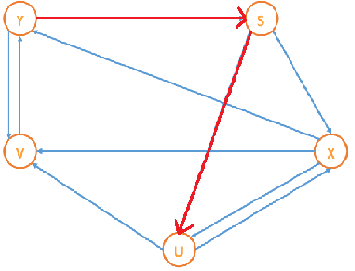

In [32]:
graph_test = {'S': {'U', 'X'},
              'U': {'V', 'X'},
              'V': {'Y'},
              'X':{'U','V','Y'},
              'Y':{'S','V'}
             }

start = "Y"
end = "U"
print "Camino más corto desde", start, "a", end, ":"
print shortest_path(graph_test, start, end)
Image(filename='graph--bfs.png')

Para todos los nodos:

In [33]:
def find_all_shortest_path(graph, nodes):
    path = []
    datas = []
    for i in range(0, len(nodes)):
        for j in range(0, len(nodes)):
            data = []
            if nodes[i] != nodes[j]:
                data.append(nodes[i])
                data.append(nodes[j])
                datas.append(data)
                path.append(shortest_path(graph, nodes[i], nodes[j]))
    
    return datas, path

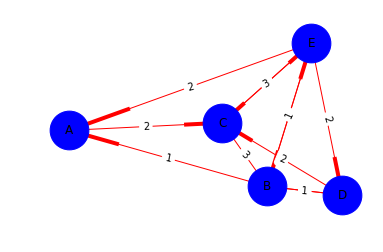

Camino desde D a B :
['D', 'B'] 

Camino desde D a E :
['D', 'C', 'E'] 

Camino desde D a A :
['D', 'B', 'A'] 

Camino desde D a C :
['D', 'C'] 

Camino desde B a D :
['B', 'D'] 

Camino desde B a E :
['B', 'E'] 

Camino desde B a A :
['B', 'A'] 

Camino desde B a C :
['B', 'C'] 

Camino desde E a D :
['E', 'D'] 

Camino desde E a B :
['E', 'B'] 

Camino desde E a A :
['E', 'A'] 

Camino desde E a C :
['E', 'C'] 

Camino desde A a D :
['A', 'C', 'E', 'D'] 

Camino desde A a B :
['A', 'C', 'E', 'B'] 

Camino desde A a E :
['A', 'C', 'E'] 

Camino desde A a C :
['A', 'C'] 

Camino desde C a D :
['C', 'E', 'D'] 

Camino desde C a B :
['C', 'E', 'B'] 

Camino desde C a E :
['C', 'E'] 

Camino desde C a A :
['C', 'E', 'A'] 



In [34]:
datas, path =  find_all_shortest_path(graph, nodes)

draw_graph(graph)

for i in range(0, len(path)):
    if path[i] != None:
        print "Camino desde", datas[i][0], "a", datas[i][1], ":"
        print path[i], "\n"

<h3>Punto 5</h3>

<i>Compare experimentalmente los algoritmos incluyendo Floyd-Warshall para grafos aleatorios densos ($\psi$ cercano a 0) variando linealmente los tamaños de $n$.</i>

Conversión de grafo a matriz.

In [35]:
def graph_to_matrix(graph):
    mat = np.ones((len(graph), len(graph))) * float('inf')
    
    for i in range(len(mat)):
        mat[i][i] = 0
    
    for node in graph:
        for conect in graph[node]:
            mat[graph.keys().index(node), graph.keys().index(conect)] = graph[node][conect]

    return mat

Crear grafo denso.

In [36]:
def randomGraph_dense(n, minw, maxw):
    if n > 26:
        n = 26
    if n < 1:
        n = 1
    for x in range(1, n+1):
        l1 = [chr(a) for a in rnd.sample(range(65, 65+x), x)]
        
    l2 = []
    for y in range(len(l1)):
        l1_c = l1[y+1:len(l1)]
        neighbors = rnd.sample(l1_c, rnd.randint(int((len(l1_c))*0.7), int((len(l1_c))*1)))
        cost = [rnd.randint(minw, maxw) for r in xrange(len(neighbors))]
        l2.append(dict(zip(neighbors, cost)))
            
    graph = dict(zip(l1, l2))

    return l1, graph

Ejemplo:

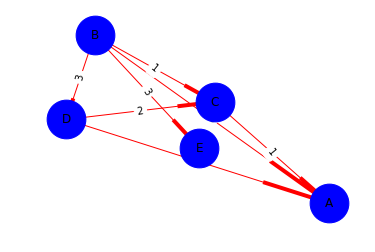

In [37]:
nodes, graph = randomGraph_dense(5, 1, 3)

draw_graph(graph)

Obtener tiempo de ejecución.

In [38]:
def analysis_denseGraph(n):
    time_floyd = []
    time_dijks = []
    time_bell = []
    time_bfs = []
    timeP = []
    
    for i in range(1, n+1):
        nodes, graph = randomGraph_dense(i, 1, 5)
        start = rnd.choice(nodes)
        
        graph_mat = graph_to_matrix(graph)
        
        tic = time.clock()
        FloydWarshall(graph_mat)
        toc = time.clock()
        time_floyd.append(toc - tic)
        
        tic = time.clock()
        find_all_dijkstra(graph)
        toc = time.clock()
        time_dijks.append(toc - tic)
        
        tic = time.clock()
        find_all_bellman(graph)
        toc = time.clock()
        time_bell.append(toc - tic)
        
        tic = time.clock()
        find_all_shortest_path(graph, nodes)
        toc = time.clock()
        time_bfs.append(toc - tic)
        
    timeP = [time_floyd, time_dijks, time_bell, time_bfs]
    return timeP

<b>Grafica:</b>
<br>Azul -> Floyd-Warshall</br>
<br>Rojo -> Dijkstra</br>
<br>Verde -> Bellman-Ford</br>
<br>Amarillo -> BFS</br>

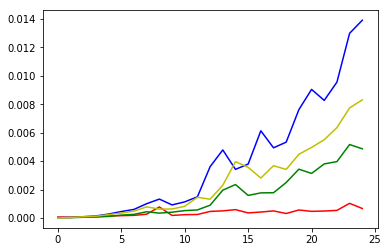

In [40]:
plt.clf()
res = analysis_denseGraph(25)
x = np.arange(25)
y_floyd = np.array(res[0])
y_dijks = np.array(res[1])
y_bell = np.array(res[2])
y_bfs = np.array(res[3])

plt.plot(x, y_floyd, 'b', y_dijks, 'r', y_bell, 'g', y_bfs, 'y')

<h3>Punto 6</h3>

<i>Compare experimentalmente los algoritmos incluyendo Floyd-Warshall para grafos aleatorios dispersos ($\psi$ cercano a 1) variando linealmente los tamaños de $n$.</i>

Crear grafo disperso.

In [41]:
def randomGraph_sparse(n, minw, maxw):
    if n > 26:
        n = 26
    if n < 1:
        n = 1
    for x in range(1, n+1):
        l1 = [chr(n) for n in rnd.sample(range(65, 65+x), x)]
        
    l2 = []
    for y in range(len(l1)):
        l1_c = l1[y+1:len(l1)]
        neighbors = rnd.sample(l1_c, rnd.randint(int((len(l1_c))*0.6), int((len(l1_c))*0.7)))
        cost = [rnd.randint(minw, maxw) for r in xrange(len(neighbors))]
        l2.append(dict(zip(neighbors, cost)))
            
    graph = dict(zip(l1, l2))

    return l1, graph

Ejemplo:

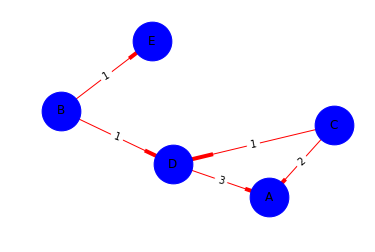

In [42]:
nodes, graph = randomGraph_sparse(5, 1, 3)

draw_graph(graph)

Obtener tiempo de ejecución.

In [43]:
def analysis_sparseGraph(n):
    time_floyd = []
    time_dijks = []
    time_bell = []
    time_bfs = []
    timeP = []
    
    for i in range(1, n+1):
        nodes, graph = randomGraph_sparse(i, 1, 5)
        start = rnd.choice(nodes)
        
        graph_mat = graph_to_matrix(graph)
        
        tic = time.clock()
        FloydWarshall(graph_mat)
        toc = time.clock()
        time_floyd.append(toc - tic)
        
        tic = time.clock()
        find_all_dijkstra(graph)
        toc = time.clock()
        time_dijks.append(toc - tic)
        
        tic = time.clock()
        find_all_bellman(graph)
        toc = time.clock()
        time_bell.append(toc - tic)
        
        tic = time.clock()
        find_all_shortest_path(graph, nodes)
        toc = time.clock()
        time_bfs.append(toc - tic)
        
    timeP = [time_floyd, time_dijks, time_bell, time_bfs]
    return timeP

<b>Grafica:</b>
<br>Azul -> Floyd-Warshall</br>
<br>Rojo -> Dijkstra</br>
<br>Verde -> Bellman-Ford</br>
<br>Amarillo -> BFS</br>

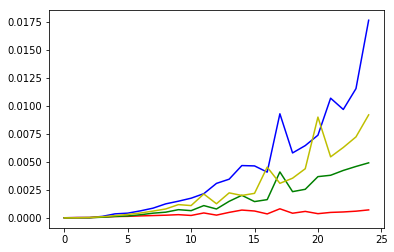

In [48]:
plt.clf()
res = analysis_denseGraph(25)
x = np.arange(25)
y_floyd = np.array(res[0])
y_dijks = np.array(res[1])
y_bell = np.array(res[2])
y_bfs = np.array(res[3])

plt.plot(x, y_floyd, 'b', y_dijks, 'r', y_bell, 'g', y_bfs, 'y')

<h3>Bibliografía</h3>

<br>http://stackoverflow.com/questions/20133479/how-to-draw-directed-graphs-using-networkx-in-python</br>
<br>http://code.activestate.com/recipes/576675-bfs-breadth-first-search-graph-traversal/</br>